# Predicting Default Payments with Fully-Connected NNs

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Inspecting the data

any comment about data dimensionality/distribution goes here

In [1]:
# import librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# carichiamo il dataset
train_data = pd.read_csv("train.csv")

In [3]:
train_data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [4]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,19193,200000,2,1,1,38,-2,-2,-2,-2,...,2571,2571,2571,2772,2571,2571,2571,2571,2571,0
1,1131,230000,2,2,1,34,0,0,0,0,...,155335,153427,150514,8913,5449,5339,5370,4435,4432,1
2,17557,50000,2,2,2,42,0,0,0,0,...,49311,24663,24854,1763,2112,1756,324,336,351,0
3,29901,20000,1,2,2,29,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,14696,30000,2,3,1,59,1,2,2,2,...,30467,29858,28898,1950,200,2492,0,580,0,1


In [5]:
train_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,25500.00000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,...,25500.000000,25500.000000,25500.000000,25500.000000,2.550000e+04,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,14956.95702,167569.007059,1.604118,1.852353,1.550392,35.509294,-0.013098,-0.130784,-0.163294,-0.218235,...,43336.952196,40307.121059,38924.328157,5594.010863,5.934389e+03,5319.529647,4812.161373,4812.480431,5236.509176,0.222941
std,8667.36982,130002.156470,0.489049,0.787991,0.522757,9.200408,1.126314,1.199481,1.199697,1.169681,...,64433.082446,60870.691089,59659.509920,16235.253410,2.381277e+04,18157.653215,15560.524538,15206.108094,17958.888070,0.416227
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7432.75000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2338.750000,1767.250000,1266.750000,1000.000000,8.270000e+02,396.000000,291.000000,251.000000,125.750000,0.000000
50%,14942.50000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19111.000000,18112.500000,17150.000000,2100.000000,2.002000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22431.25000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54475.000000,50178.250000,49132.500000,5006.000000,5.000000e+03,4560.500000,4000.000000,4071.500000,4000.000000,0.000000
max,30000.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          25500 non-null  int64
 1   LIMIT_BAL                   25500 non-null  int64
 2   SEX                         25500 non-null  int64
 3   EDUCATION                   25500 non-null  int64
 4   MARRIAGE                    25500 non-null  int64
 5   AGE                         25500 non-null  int64
 6   PAY_0                       25500 non-null  int64
 7   PAY_2                       25500 non-null  int64
 8   PAY_3                       25500 non-null  int64
 9   PAY_4                       25500 non-null  int64
 10  PAY_5                       25500 non-null  int64
 11  PAY_6                       25500 non-null  int64
 12  BILL_AMT1                   25500 non-null  int64
 13  BILL_AMT2                   25500 non-null  int64
 14  BILL_A

In [7]:
# Controlla la dimensionalità del dataset di training e test
print("Dimensionalità del dataset di training:", train_data.shape)

Dimensionalità del dataset di training: (25500, 25)


In [8]:
# controllo presenza di valori nulli
train_data.isnull().sum().any()

False

In [9]:
# controllo di presenza di valori duplicati
train_data.duplicated().sum()

0

In [10]:
np.isinf(train_data.values).any()

False

### Analisi statica univariata

In [11]:
# Mostra i valori unici di ciascuna colonna categorica
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in categorical_columns:
    print(f"{col}: {train_data[col].unique()}")

SEX: [2 1]
EDUCATION: [1 2 3 5 4 6 0]
MARRIAGE: [1 2 3 0]
PAY_0: [-2  0  1 -1  2  3  6  5  4  8  7]
PAY_2: [-2  0  2 -1  1  5  3  4  7  6  8]
PAY_3: [-2  0  2 -1  4  3  6  7  5  8  1]
PAY_4: [-2  0  2 -1  3  5  7  4  8  1  6]
PAY_5: [-2  0  2 -1  3  4  7  5  6  8]
PAY_6: [-2  0 -1  2  3  5  7  4  6  8]


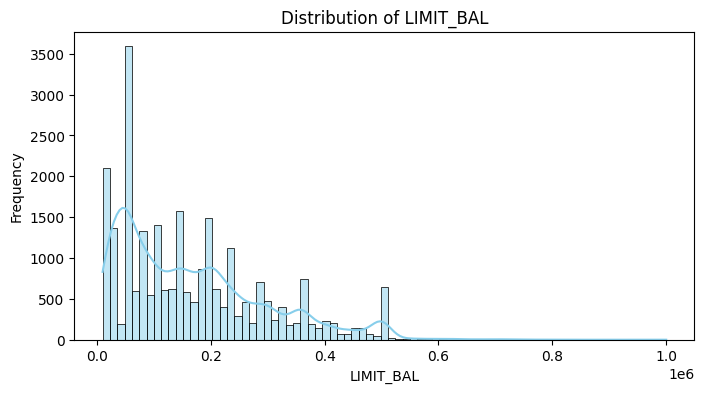

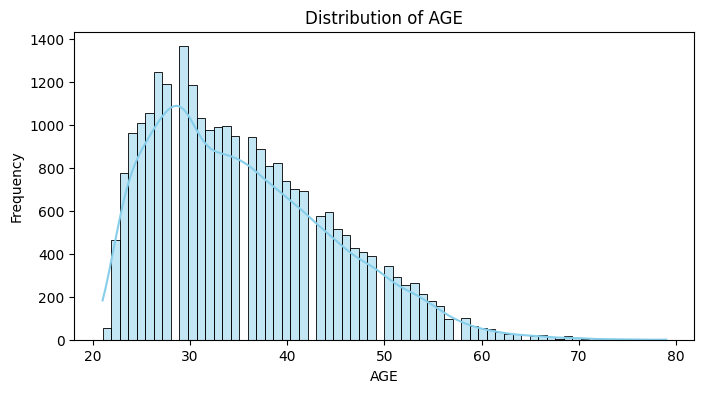

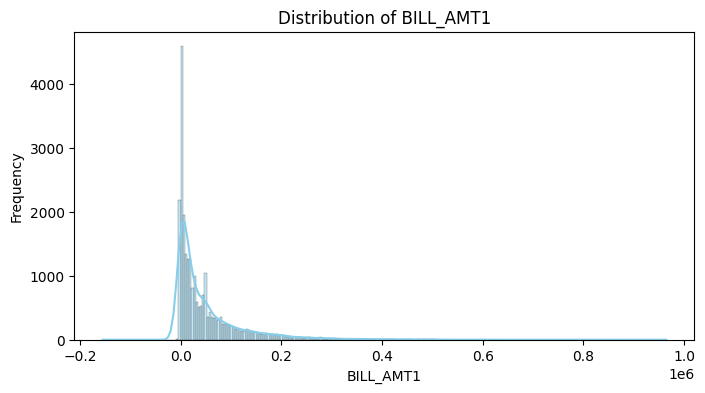

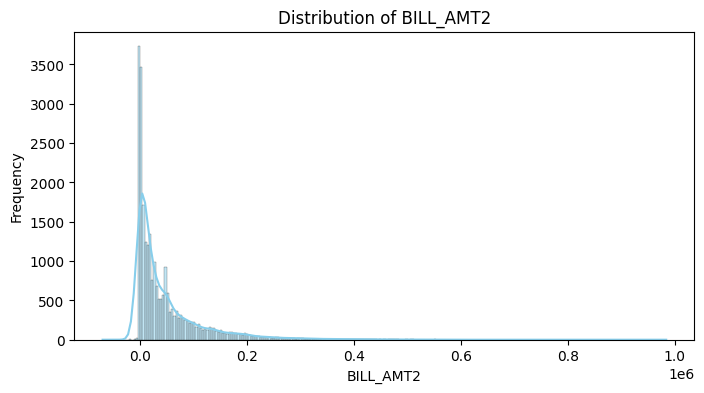

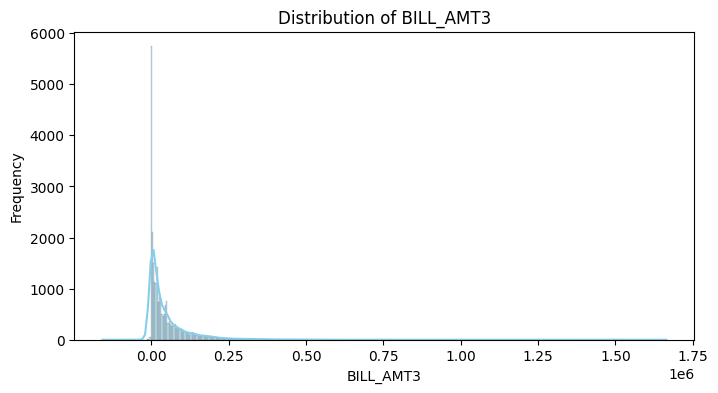

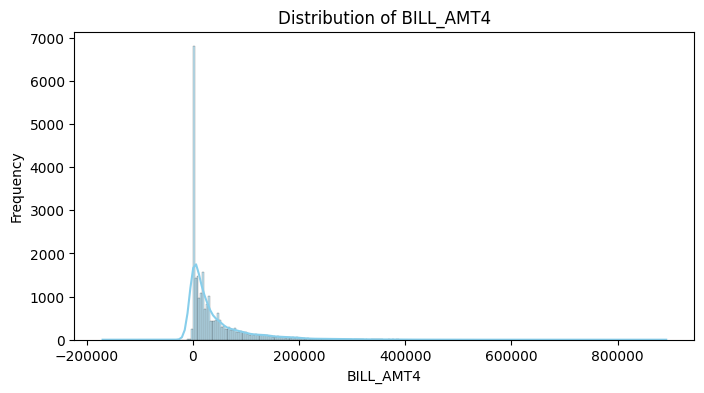

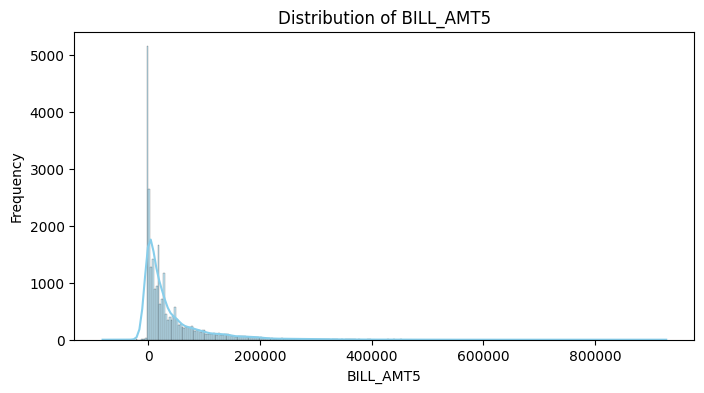

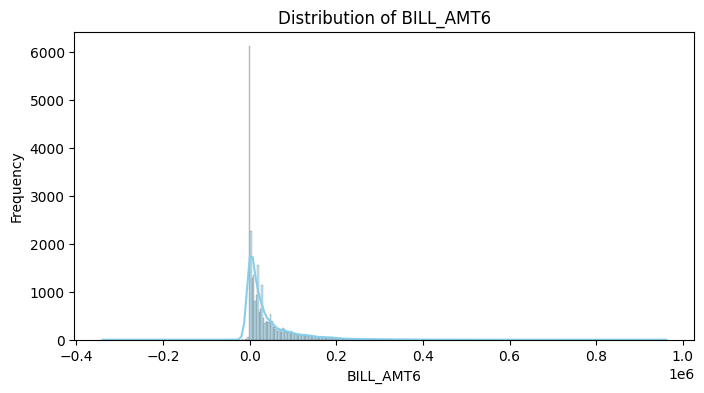

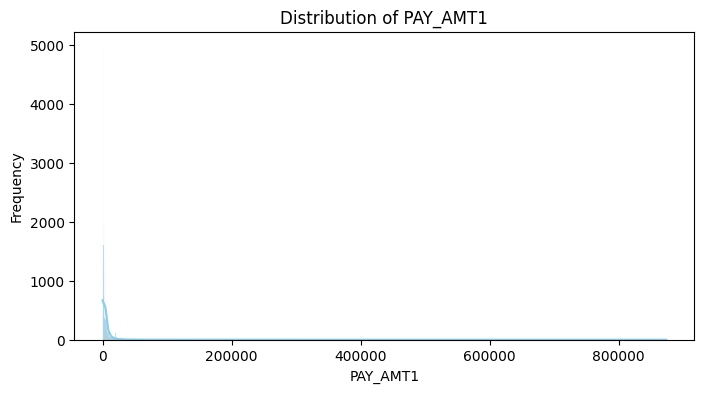

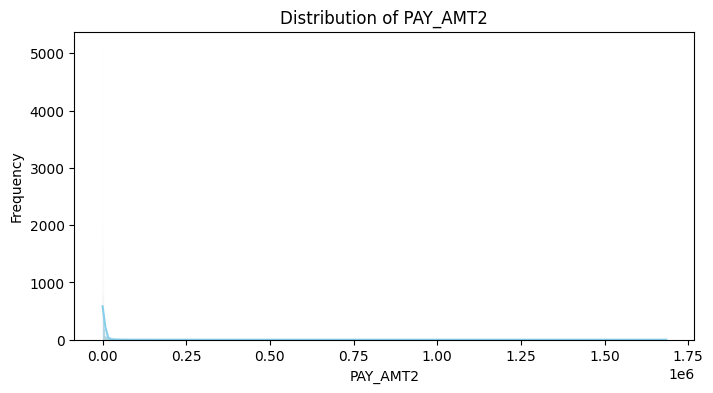

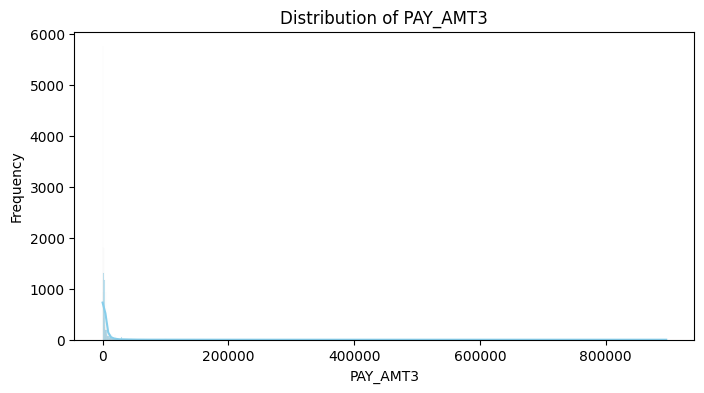

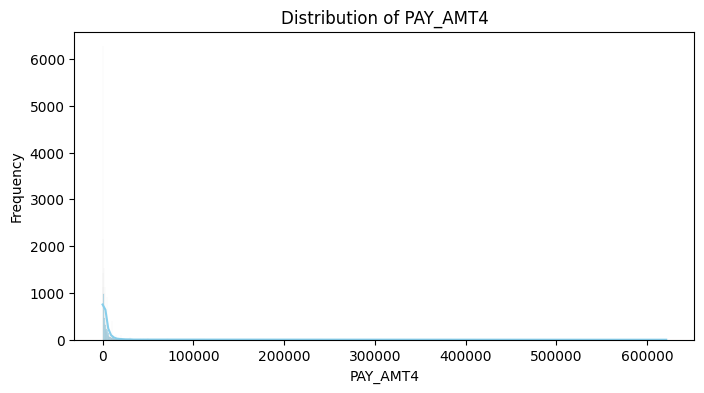

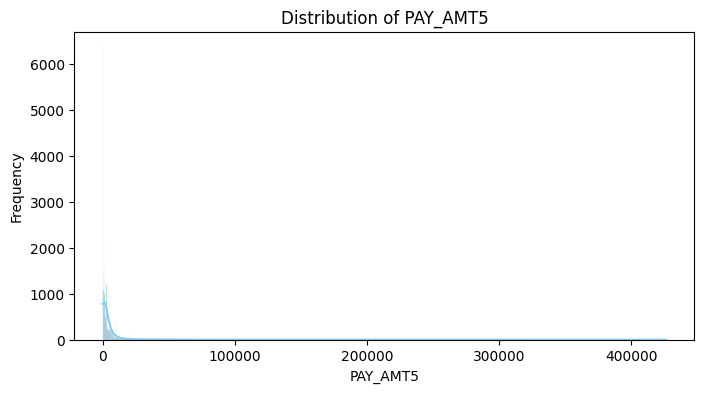

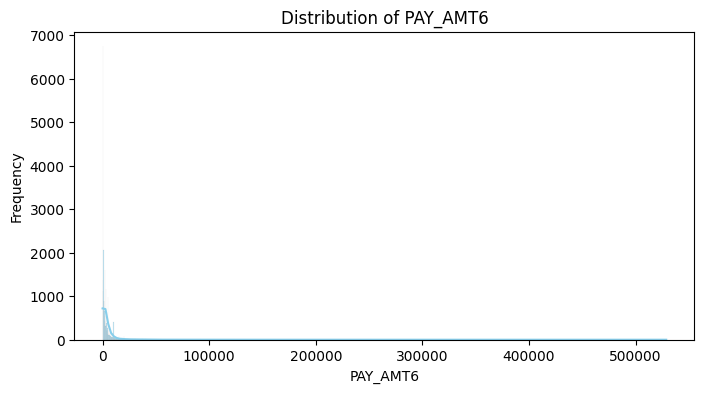

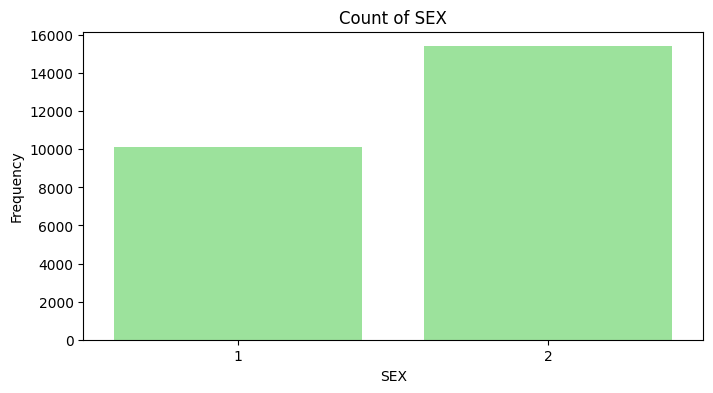

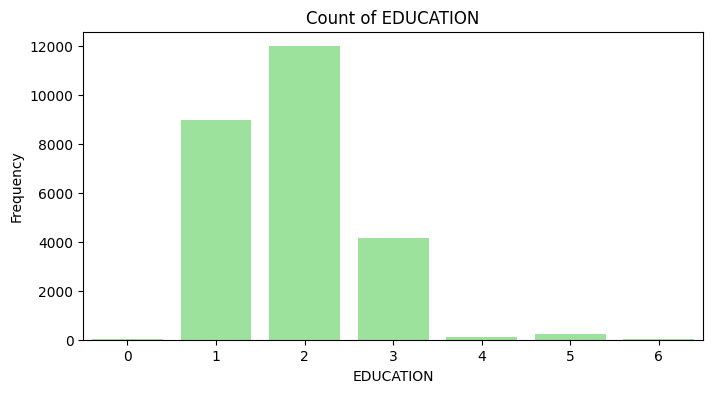

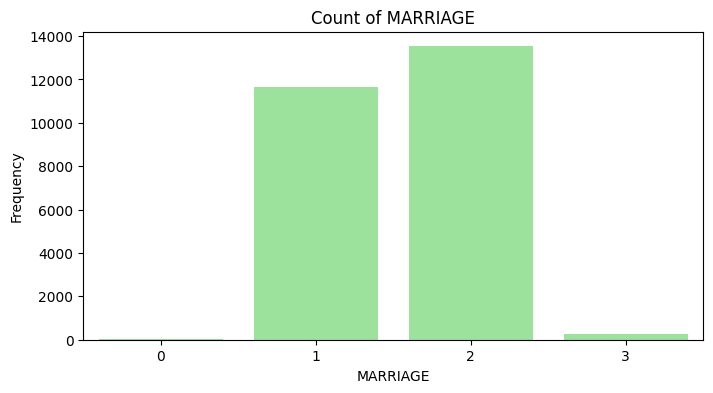

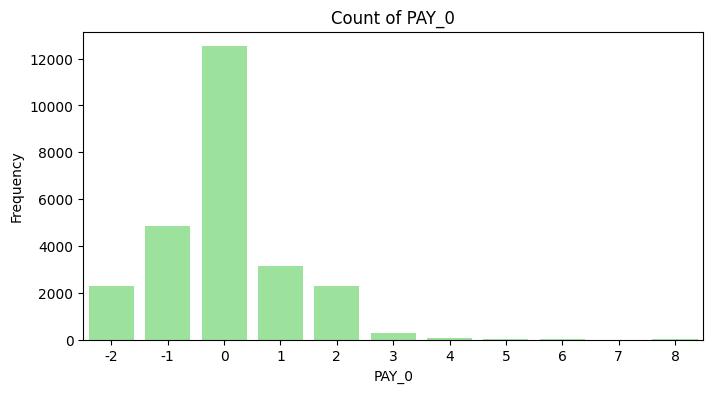

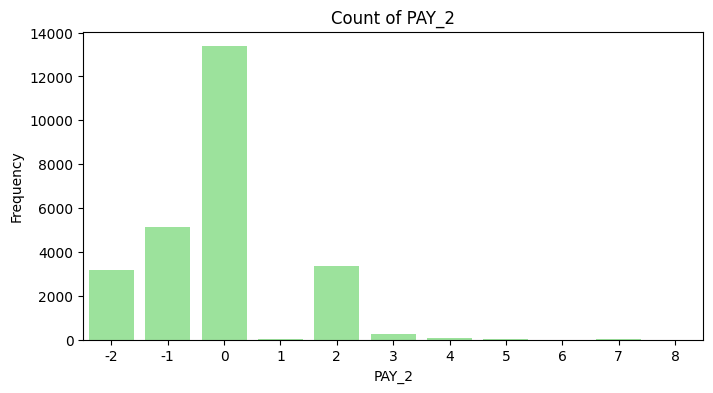

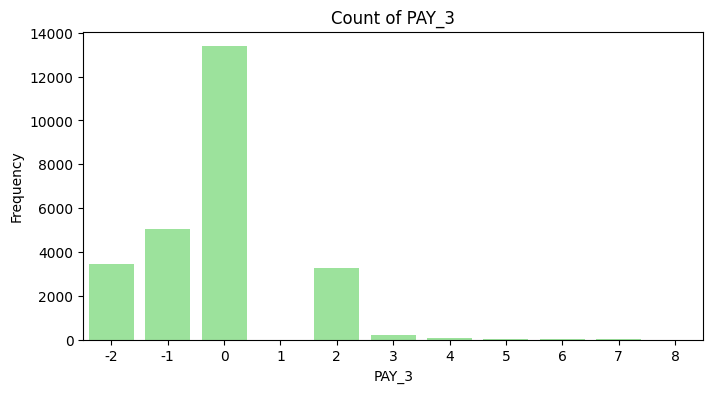

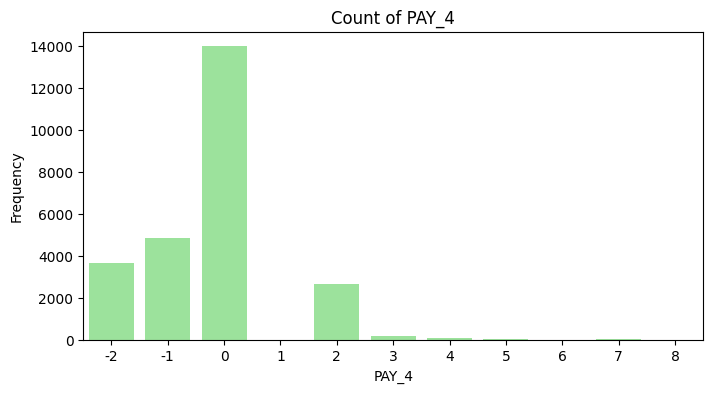

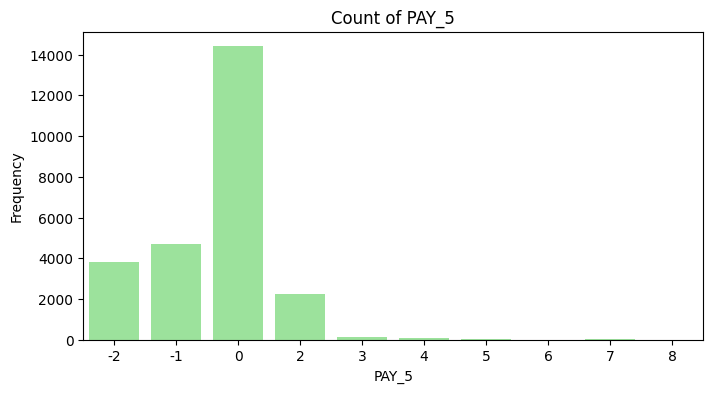

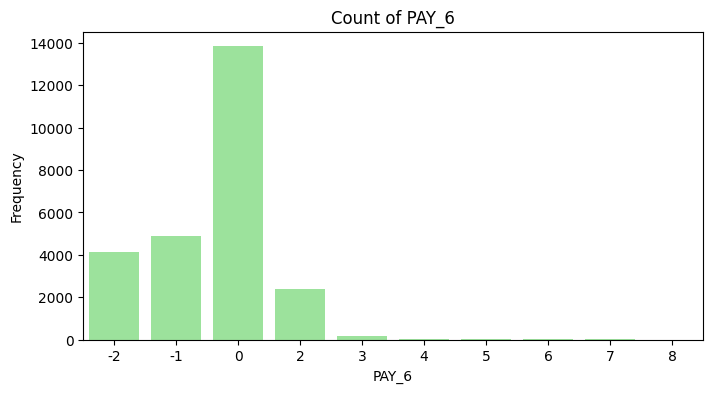

In [12]:
# Variabili numeriche e categoriche
numerical_columns = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE'] + ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Analisi univariata delle variabili numeriche
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Analisi univariata con percentuali per variabili categoriche
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=train_data[column], color='lightgreen')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


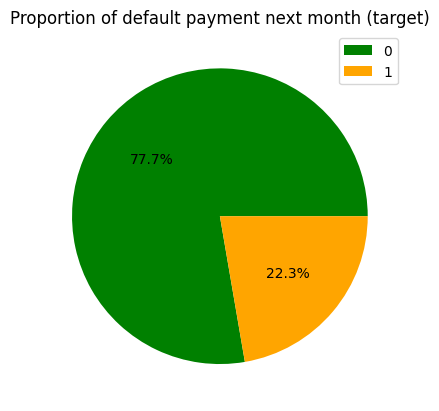

In [13]:
column = 'default payment next month'
total_rows = len(train_data)
counts = train_data[column].value_counts()
percentages = [count / total_rows * 100 for count in counts]
plt.pie(percentages, autopct='%1.1f%%', colors=['green', 'orange'])
plt.title(f'Proportion of {column} (target)')
labels = ['0', '1']
plt.legend(labels=labels, loc='upper right')
plt.show()

Distribuzione delle classi:
default payment next month
0    19815
1     5685
Name: count, dtype: int64


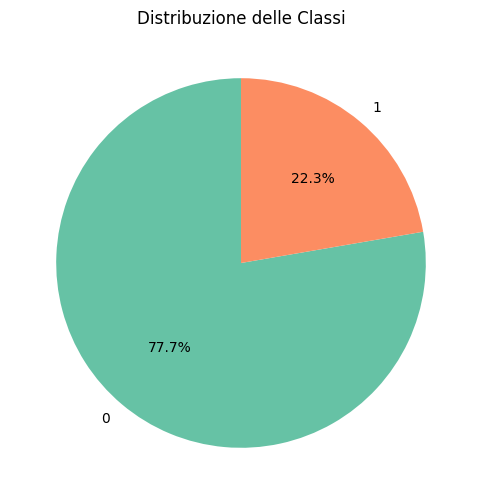

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponendo che il target sia la colonna 'default payment next month' del DataFrame df
class_counts = train_data['default payment next month'].value_counts()

# Mostra la distribuzione delle classi
print("Distribuzione delle classi:")
print(class_counts)

# Grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribuzione delle Classi')
plt.show()


### Analisi statica Multivaraiata

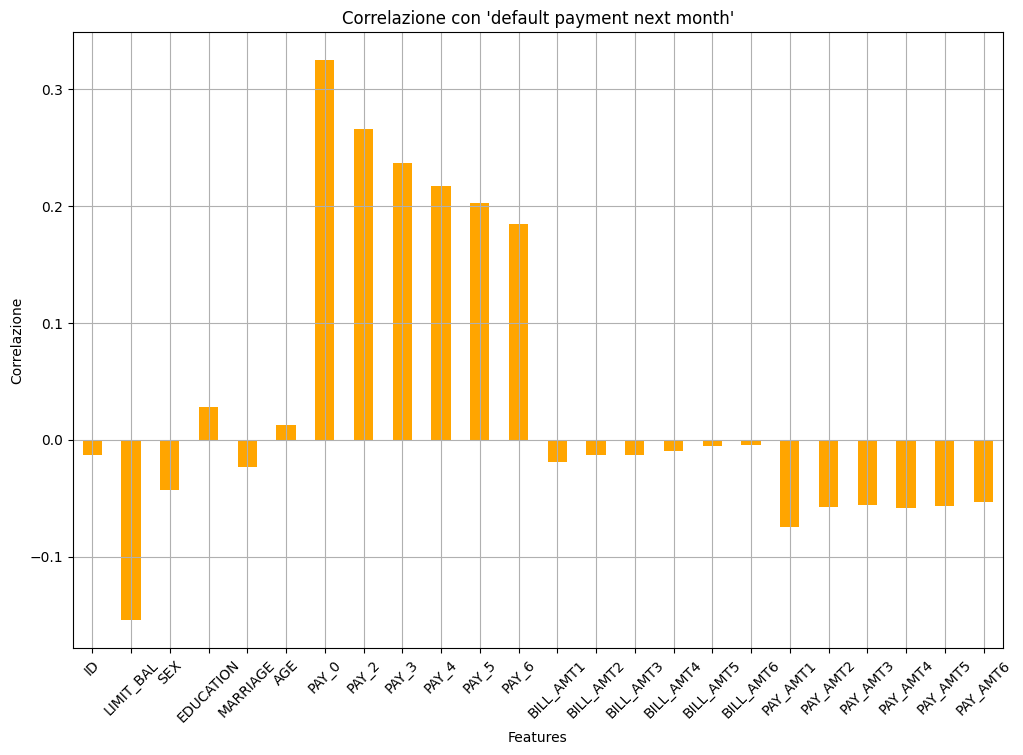

In [15]:
# Calcola la correlazione tra ogni feature e il target
correlation = train_data.drop('default payment next month', axis=1).corrwith(train_data['default payment next month'])

# Crea un grafico a barre per visualizzare le correlazioni
plt.figure(figsize=(12, 8))
correlation.plot(kind='bar', grid=True, color='orange')
plt.title("Correlazione con 'default payment next month'")
plt.xlabel("Features")
plt.ylabel("Correlazione")
plt.xticks(rotation=45)
plt.show()


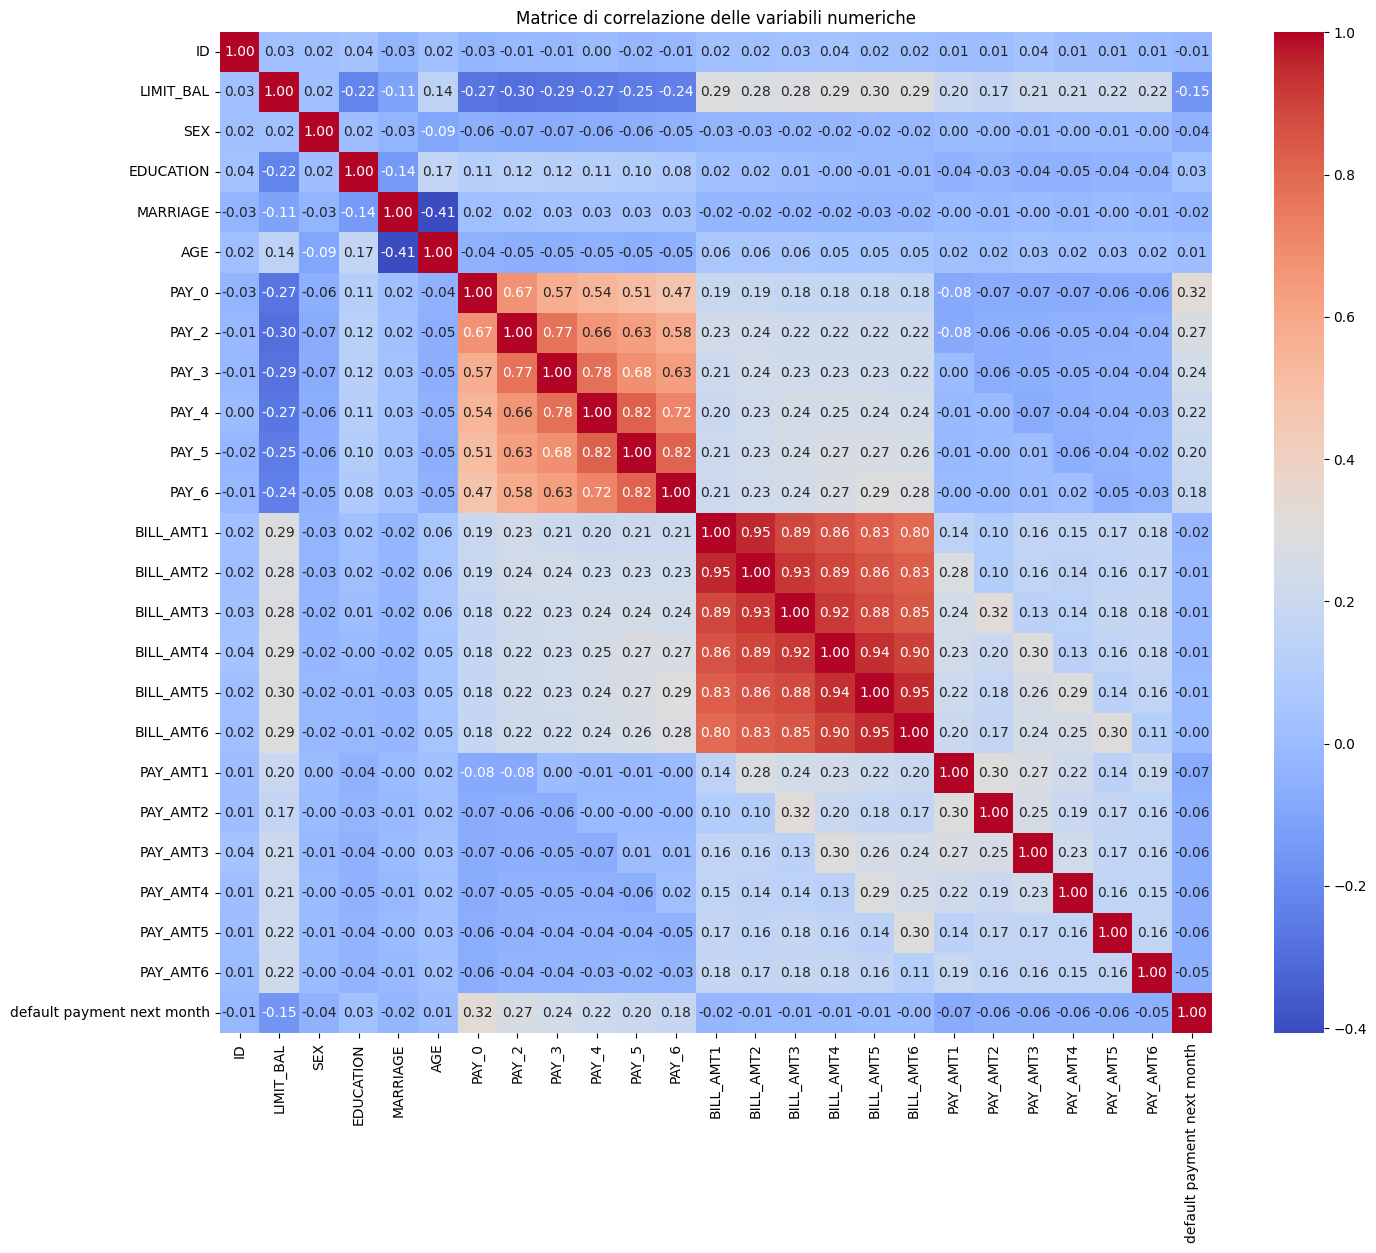

In [16]:
# relazioni tra variabili
# Mappa di correlazione
plt.figure(figsize=(16, 13))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione delle variabili numeriche')
plt.show()


In [17]:
df = train_data.drop(columns=['ID'])
#df = df.drop(columns=['LIMIT_BAL'])
#df = df.drop(columns=['SEX'])
#df = df.drop(columns=['MARRIAGE'])
#df = df.drop(columns=['BILL_AMT1'])
#df = df.drop(columns=['BILL_AMT2'])
#df = df.drop(columns=['BILL_AMT3'])
#df = df.drop(columns=['BILL_AMT4'])
#df = df.drop(columns=['BILL_AMT5'])
#df = df.drop(columns=['BILL_AMT6'])
#df = df.drop(columns=['PAY_AMT1'])
#df = df.drop(columns=['PAY_AMT2'])
#df = df.drop(columns=['PAY_AMT3'])
#df = df.drop(columns=['PAY_AMT4'])
#df = df.drop(columns=['PAY_AMT5'])
#df = df.drop(columns=['PAY_AMT6'])

In [18]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

## Building the network

any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. optimizer choice, final activations, loss functions, training metrics)

In [19]:
#from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [20]:
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

In [21]:
# Definisci le colonne categoriali e numeriche
columns_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE']
columns_pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Trova le colonne numeriche escludendo sia quelle da codificare che quelle di pagamento
numerical_columns = X.columns.difference(columns_to_encode + columns_pay)

In [22]:
# Bilanciamento
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [23]:
# One hot encoding
X = pd.get_dummies(X, columns=columns_to_encode, drop_first=True)

In [24]:
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
#x_test = scaler.transform(x_test)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Addestramento modello con Adam

In [27]:
dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = 1
print('Number classes = Output Shape =', nb_classes)

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Input Shape = 30
Number classes = Output Shape = 1


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,337 (16.94 KB)

 Trainable params: 4,337 (16.94 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(x_train, y_train, batch_size=60, epochs=50, validation_split=0.1)

Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5419 - loss: 0.7027 - val_accuracy: 0.6879 - val_loss: 0.6214
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6906 - loss: 0.6130 - val_accuracy: 0.7193 - val_loss: 0.5841
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7238 - loss: 0.5757 - val_accuracy: 0.7413 - val_loss: 0.5531
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7329 - loss: 0.5560 - val_accuracy: 0.7456 - val_loss: 0.5391
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7380 - loss: 0.5403 - val_accuracy: 0.7477 - val_loss: 0.5312
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7402 - loss: 0.5335 - val_accuracy: 0.7485 - val_loss: 0.5278
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7445 - loss: 0.5277 - val_accuracy: 0.7514 - val_loss: 0.5244
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7490 - loss: 0.5222 - val_accuracy: 0.

In [30]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

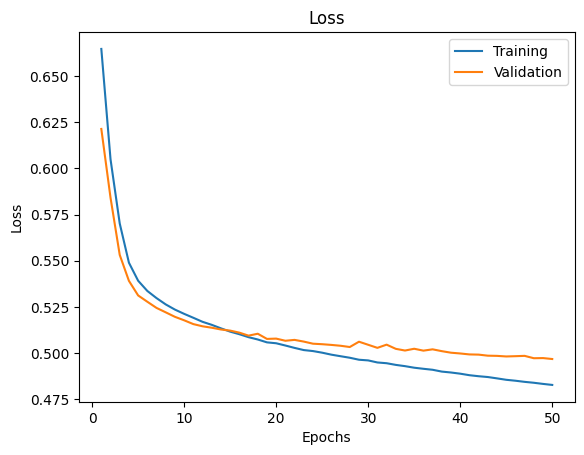

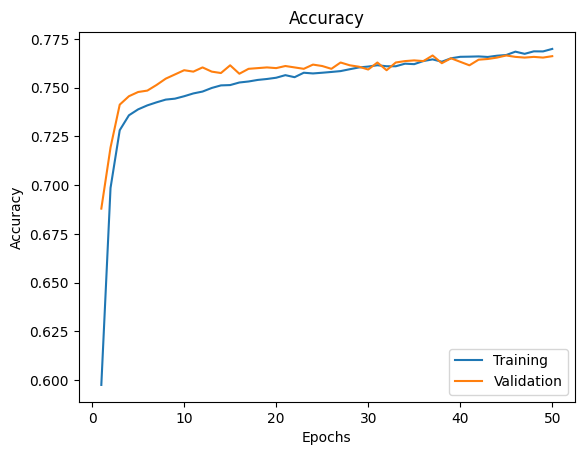

In [31]:
plot_loss(history)
plot_accuracy(history)

In [32]:
from sklearn.metrics import classification_report
import numpy as np

# Ottenere le previsioni per il set di test
y_pred_test = model.predict(x_test)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_test_bin = np.round(y_pred_test)

# Ottenere le previsioni per il set di train
y_pred_train = model.predict(x_train)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_train_bin = np.round(y_pred_train)

print("Prestazioni sul Set di Addestramento:")
print(classification_report(y_train, y_pred_train_bin))

print("Prestazioni sul Set di Test:")
print(classification_report(y_test, y_pred_test_bin))

372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step
Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78     13889
           1       0.79      0.74      0.76     13852

    accuracy                           0.77     27741
   macro avg       0.77      0.77      0.77     27741
weighted avg       0.77      0.77      0.77     27741

Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      5926
           1       0.78      0.73      0.76      5963

    accuracy                           0.77     11889
   macro avg       0.77      0.77      0.76     11889
weighted avg       0.77      0.77      0.76     11889



In [33]:
from sklearn.metrics import f1_score
y_pred_prob = model.predict(x_test)  # Previsioni probabilistiche
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertire probabilità in classi

# 7. Calcolare e stampare l'F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
F1 Score: 0.757849089332177


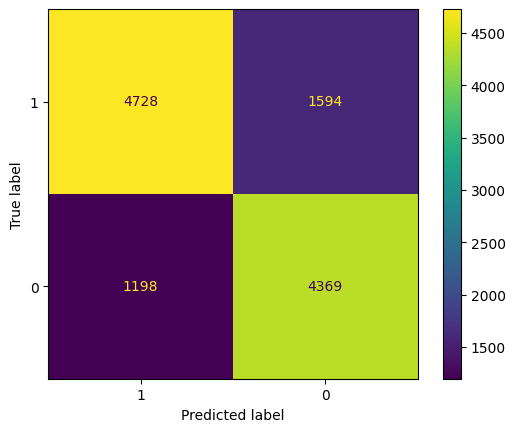

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calcolo della matrice di confusione
cm = confusion_matrix(y_pred_test_bin, y_test)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

#### Addestramento con SGD

In [271]:
dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = 1
print('Number classes = Output Shape =', nb_classes)

model2 = Sequential()
model2.add(Input((dims,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=0.01)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Input Shape = 30
Number classes = Output Shape = 1


In [272]:
model2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,577 (56.94 KB)

 Trainable params: 14,577 (56.94 KB)

 Non-trainable params: 0 (0.00 B)

In [273]:
history2 = model2.fit(x_train, y_train, batch_size=100, epochs=50, validation_split=0.1)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5649 - loss: 0.6803 - val_accuracy: 0.6886 - val_loss: 0.6290
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - loss: 0.6181 - val_accuracy: 0.7308 - val_loss: 0.5741
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7204 - loss: 0.5712 - val_accuracy: 0.7441 - val_loss: 0.5473
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7319 - loss: 0.5522 - val_accuracy: 0.7477 - val_loss: 0.5335
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7396 - loss: 0.5388 - val_accuracy: 0.7459 - val_loss: 0.5271
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7352 - loss: 0.5384 - val_accuracy: 0.7495 - val_loss: 0.5231
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7371 - loss: 0.5332 - val_accuracy: 0.7506 - val_loss: 0.5220
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7445 - loss: 0.5271 - val_accuracy: 0.

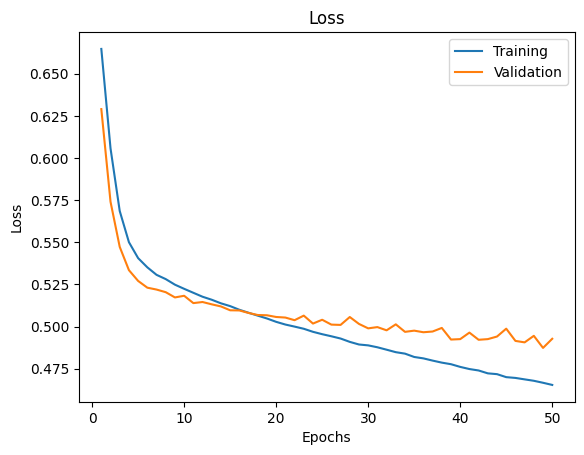

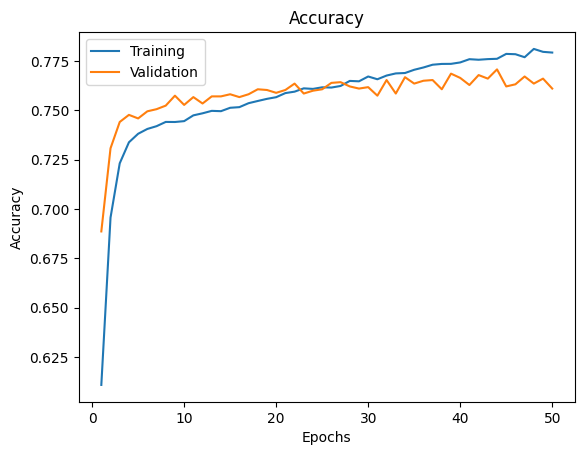

In [274]:
plot_loss(history2)
plot_accuracy(history2)

In [275]:
from sklearn.metrics import classification_report
import numpy as np

# Ottenere le previsioni per il set di test
y_pred_test = model2.predict(x_test)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_test_bin = np.round(y_pred_test)

# Ottenere le previsioni per il set di train
y_pred_train = model2.predict(x_train)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_train_bin = np.round(y_pred_train)

print("Prestazioni sul Set di Addestramento:")
print(classification_report(y_train, y_pred_train_bin))

print("Prestazioni sul Set di Test:")
print(classification_report(y_test, y_pred_test_bin))

372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step
Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77     13889
           1       0.77      0.80      0.78     13852

    accuracy                           0.78     27741
   macro avg       0.78      0.78      0.78     27741
weighted avg       0.78      0.78      0.78     27741

Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      5926
           1       0.76      0.78      0.77      5963

    accuracy                           0.76     11889
   macro avg       0.76      0.76      0.76     11889
weighted avg       0.76      0.76      0.76     11889



In [276]:
from sklearn.metrics import f1_score
y_pred_prob = model2.predict(x_test)  # Previsioni probabilistiche
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertire probabilità in classi

# 7. Calcolare e stampare l'F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
F1 Score: 0.7682675673449213


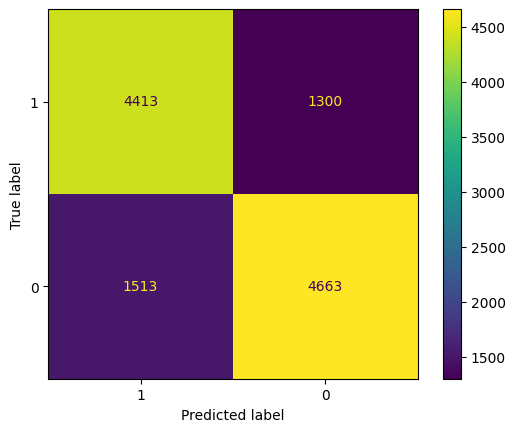

In [277]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calcolo della matrice di confusione
cm = confusion_matrix(y_pred_test_bin, y_test)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

## Analyze and comment the training results

here goes any comment/visualization of the training history and any initial consideration on the training results  

## Validate the model and comment the results

please describe the evaluation procedure on a validation set, commenting the generalization capability of your model (e.g. under/overfitting). You may also describe the performance metrics that you choose: what is the most suitable performance measure (or set of performance measures) in this case/dataset, according to you? Why?

## Make predictions (on the provided test set)

Based on the results obtained and analyzed during the training and the validation phases, what are your (rather _personal_) expectations with respect to the performances of your model on the blind external test set? Briefly motivate your answer.

In [278]:
test_data = pd.read_csv("test.csv")
print(test_data.head())

      ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   9956     180000    2          2         1   32     -1      2     -1   
1    879      50000    2          2         1   43      0      0      0   
2    554     240000    2          1         1   42      1     -1     -1   
3    142     180000    1          2         2   28     -1     -1     -1   
4  14630     320000    2          1         1   39      0      0      0   

   PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      0  ...       7658       1000       1650       1000         0      7667   
1     -1  ...      20165      10732      10566      10757      1800      1775   
2     -2  ...          0          0          0          0      6370         0   
3     -1  ...        832        332        416        416         0       416   
4      0  ...     128832     133329      53870      13185      5000     15000   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         0      1

In [279]:
columns_delete = ['ID']
df_test = test_data.drop(columns=columns_delete)

In [280]:
# Definisci le colonne categoriali e numeriche
columns_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE']
columns_pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Trova le colonne numeriche escludendo sia quelle da codificare che quelle di pagamento
numerical_columns = df_test.columns.difference(columns_to_encode + columns_pay)

In [281]:
# One hot encoding
df_test = pd.get_dummies(df_test, columns=columns_to_encode, drop_first=True)

In [282]:
scaler = StandardScaler()
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])
#x_test = scaler.transform(x_test)

In [283]:
df_test

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.101294,-0.359696,-1,2,-1,0,-1,-1,-0.673565,-0.677321,...,True,False,True,False,False,False,False,True,False,False
1,-0.911995,0.821160,0,0,0,-1,0,0,-0.375293,-0.346942,...,True,False,True,False,False,False,False,True,False,False
2,0.568967,0.713810,1,-1,-1,-2,-2,-2,-0.701063,-0.601985,...,True,True,False,False,False,False,False,True,False,False
3,0.101294,-0.789098,-1,-1,-1,-1,-1,-1,-0.675761,-0.691201,...,False,False,True,False,False,False,False,False,True,False
4,1.192529,0.391758,0,0,0,0,0,0,2.150454,0.949813,...,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.491021,2.646119,0,0,0,0,0,0,1.115828,1.159142,...,False,False,True,False,False,False,False,True,False,False
4496,-1.145832,1.143212,0,0,0,0,0,0,-0.459598,-0.431368,...,False,False,True,False,False,False,False,True,False,False
4497,-0.600214,-0.896449,2,2,2,2,2,0,0.515335,0.572403,...,False,False,False,True,False,False,False,False,True,False
4498,0.257185,-0.252345,2,-1,-1,-1,-1,-1,-0.686202,-0.681453,...,True,True,False,False,False,False,False,True,False,False


In [284]:
predictions = model.predict(df_test)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step


# OPTIONAL -- Export the predictions in the format indicated in the assignment release page and verify you prediction on the [assessment page](https://aml-assignmentone-2425.streamlit.app/).

In [285]:
predicted_classes = (predictions > 0.5).astype(int)  # 1 se probabilità > 0.5, altrimenti 0
#predicted_classes3 = (predictions3 > 0.5).astype(int)

df_test['predicted_target'] = predicted_classes
#df_test['predicted_target3'] = predicted_classes3
#df_test.to_csv('test_with_predictions.csv', index=False)


In [286]:
# Crea un DataFrame con le previsioni
predictions_df = pd.DataFrame(predicted_classes)

# Salva il DataFrame in un file CSV senza intestazioni e senza indice
#predictions_df.to_csv(r"C:\\Users\\lperf\\Downloads\\predictions.csv", header=False, index=False)